# Вітаю на фінальному проєкті!
Протягом курсу ми навчились завантажувати дані в Python, трансформувати їх, чистити, агрегувати, знаходити з допомогою даних відповіді на наші питання. 
Задача фінального проєкту - продемонструвати той рівень роботи з даними, на якому ви є зараз. 

Цей ноутбук буде присвячений аналізу даних з файла `Grocery DataBase.xlsx`, який є в папці `Дані` на Диску. Так, це Excel файл, але ми можемо дуже просто завантажувати дані з нього у Python. Покажу пару команд для роботи з Excel файлом.

Для початку встановимо бібліотеку, яка потрібна для роботи з Excel файлами з pandas. Можна встановити тут, або в терміналі, але якщо Ви встановлюєте в терміналі, то після того треба перезапустити ядро (Kernel) ноутбуку, аби бібліотека точно підтягнулась. Іноді підтягується і без того, але це на випадок, що робити, якщо компілятор каже, що її не бачить.

In [1]:
!pip install openpyxl

     -------------------------------------- 250.0/250.0 kB 7.7 MB/s eta 0:00:00


In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import statsmodels.api as sm
from statsmodels.stats.weightstats import ztest 
%matplotlib inline

Ось так можемо переглянути, які є листки в Excel файлі:

In [2]:
# замініть на шлях до файлу на своєму комп`ютері
path_to_file = 'C:/Users/annys/Grocery Database.xlsx'

In [3]:
xl = pd.ExcelFile(path_to_file)
xl.sheet_names

['Grosto DB', 'Sheet2', 'Fact Summary']

А так можемо зчитати конкретний листок:

In [4]:
xl.parse('Fact Summary')

,S.No.,Column Name,Description of the Column names
0,1,Receipt Number,Transaction Number
1,2,Date,Date of Transaction
2,3,Year,Year of Transaction
3,4,Month,Month of Transaction
4,5,Time,Time of the transaction
5,6,Mobile Number,Monbile number of the customer
6,7,Membership ID,Unique Membership ID of the Customer
7,8,Loyalty Card Points,Loyalty Points earned by customer (10 Points/1...
8,9,Age,Age of the Customer in the Company Database
9,10,Gender,Gender of the customer


Читати дані можна і з Pandas, але тут немає можливості переглянути наявні листки, а також довше відбувається читання даних.

In [5]:
df = pd.read_excel(path_to_file)

В файлі ви знайдете самі дані та опис колонок.   

**Задача**: Уявіть, що Вам дали цей набір даних з питанням "Що корисного ми можемо з них взяти для розвитку нашого бізнесу?". То Вам необхідно розказати бізнесу історію про ці дані у форматі
1. питання, яке Вас як робітника цього бізнесу, який дуже вболіває за його успіх, цікавить щодо цих даних
2. код для відповіді на це питання
3. висновки, які я можу зробити з огляду на результат виконання коду: які рішення ми можемо прийняти щодо подальших кроків в аналізі або які рекомендації Ви б дали бізнесу виходячи з результатів.

**Необхідно** поставити до даних _мінімум_ 10 бізнес-питань, при цьому зробивши   
- початковий аналіз даних: їх розмір, структура, наявність пропущених значень та що з ними зробити, зміна типів даних там, де це доречно зробити (наприклад, якщо колонка завантажилась як тип string, а з опису видно, що там має бути float) - ця частина не входить у бізнес-питання, але є необхідною при аналізі даних.  
- _мінімум_ 1 зведену таблицю або її аналог
- _мінімум_ 5 візуалізацій, 3 з яких мають різний тип (наприклад, scatter plot, line plot, pair plot)

В даному мінімум-наборі немає вимоги на використання SQL та тестування статистичних гіпотез. Але якщо Вам хочеться потренуватись, то Ви можете це зробити скориставшись pandasql, а також перевірити, чи є відмінність між двома групами у якомусь показнику з допомогою тестування статистичних гіпотез. Останнє найбільш доречно, якщо, наприклад, ми беремо чоловіків і жінок, бачимо що у них доволі схожі середні чеки, але наче відрізняються. Аби зрозуміти, чи різниця статистично значущою, можна це перевірити з допомогою тестування стат. гіпотез.

Питанням може бути як "Яка є кількість унікальних чеків в цьому наборі даних?" так і щось значно складніше. Якщо у Вас складне питання, і аби відповісти на нього Ви мали відповісти на 3 менших питання (зробити якісь трансформації над даними, подивитись щось), то це рахується як 3 питання з 10 необхідних у завданні. Звісно ж Ви можете зробити більше за встановлений мінімум - все буде перевірено :)

Тут є великий простір для Вашої фантазії. **Тому рекомендація:** виділіть на це завданні певну кількість годин (наприклад, середнє значення по тому, скільки у Вас займало виконання домашніх завдань в курсі, але я рекомендую не менше 2х годин роботи)
і поставте собі за ціль всю роботу вмістити в цю кількість годин.
Це дозволить Вам управляти своїм часом, пріоритизувати питання, які ставите до даних. І так часто є в роботі: коли ми не знаємо, що ми шукаємо, ми ставимо обмеження по часу (задача типу spike) і робимо все, що встигнемо, за цей час.

По закінченню - завантажуємо ноутбук на git і додаємо посилання в здачу роботи в Eduflow. 
До речі, з часом, вам може захотітись доповнити цей ноутбук, коли арсенал ваших навичок по роботі з даними розшириться. І це буде чудова ідея!

**Успіхів!**

Підготовка даних.

In [6]:
df_data = xl.parse('Grosto DB')
display(df_data.head(5))

,Receipt Number,Date,Year,Month,Time,Mobile Number,Membership ID,Loyalty Card Points,Age,Gender,...,GST,Gross Bill Amount,Payment Mode,Bank Name,% Profit Margin,% Operating Cost,% Product Cost,Profit Margin,Operating Cost,Product Cost
0,GIJ00001,2016-01-02,2016,1,10:08:03.260000,9793548581,MIDID0001,1,36,Male,...,0.1,13.32408,Card,Enterprise Bank,0.150,0.15,0.700,1.85400,1.8540,8.65200
1,GIJ00002,2016-01-02,2016,1,15:46:50.832000,9938441276,MIDID0002,2,54,Male,...,0.1,25.26480,Card,Philippine Veterans Bank,0.118,0.15,0.732,2.73760,3.4800,16.98240
2,GIJ00003,2016-01-02,2016,1,11:28:52.166000,9976742552,MIDID0003,1,16,Female,...,0.1,42.18786,Cash,BDO Unibank,0.147,0.15,0.703,1.95657,1.9965,9.35693
3,GIJ00003,2016-01-02,2016,1,11:28:52.166000,9976742552,MIDID0003,1,16,Female,...,0.1,42.18786,Cash,BDO Unibank,0.095,0.15,0.755,0.33440,0.5280,2.65760
4,GIJ00003,2016-01-02,2016,1,11:28:52.166000,9976742552,MIDID0003,2,16,Female,...,0.1,42.18786,Cash,BDO Unibank,0.120,0.15,0.730,0.52920,0.6615,3.21930


In [7]:
df_data.shape

(50447, 32)

In [8]:
df_data.dtypes

Receipt Number                 object
Date                   datetime64[ns]
Year                            int64
Month                           int64
Time                           object
Mobile Number                   int64
Membership ID                  object
Loyalty Card Points             int64
Age                             int64
Gender                         object
City                           object
Country                        object
Category                       object
Sub_Category                   object
Items                          object
Brand                          object
Description                    object
Price                         float64
QTY                             int64
DISC                          float64
Amount                        float64
Net Bill Amount               float64
GST                           float64
Gross Bill Amount             float64
Payment Mode                   object
Bank Name                      object
% Profit Mar

In [9]:
df_data.isna().sum()

Receipt Number         0
Date                   0
Year                   0
Month                  0
Time                   0
Mobile Number          0
Membership ID          0
Loyalty Card Points    0
Age                    0
Gender                 0
City                   0
Country                0
Category               0
Sub_Category           0
Items                  0
Brand                  0
Description            0
Price                  0
QTY                    0
DISC                   0
Amount                 0
Net Bill Amount        0
GST                    0
Gross Bill Amount      0
Payment Mode           0
Bank Name              0
% Profit Margin        0
% Operating Cost       0
% Product Cost         0
Profit Margin          0
Operating Cost         0
Product Cost           0
dtype: int64

In [10]:
df_data.rename(columns={"Gross Bill Amount":"Gross_Bill_Amount"}, inplace=True)
df_data.rename(columns={"Membership ID":"Membership_ID"}, inplace=True)
df_data.rename(columns={"Receipt Number":"Receipt_Number"}, inplace=True)

1. Яка є кількість унікальних чеків в цьому наборі даних?

In [11]:
unique_cheque = df_data.Gross_Bill_Amount.unique()
print(f'В наборі даних {unique_cheque.size} унікальних чеків.')

В наборі даних 12538 унікальних чеків.


2. Товари з яких трьох категорій найбільш популярні серед покупців?

In [12]:
df_data["Category"].value_counts()

Bakery & Breakfast           6770
Frozen                       6393
Beauty                       5205
Fruit & Vegetable            4370
Pet Care                     3465
Dairy, Chilled & Eggs        3381
Choco, Snacks, Sweets        3019
Kitchen & Dining             2552
Rice & Cooking Essentials    2432
Beverages                    2208
Meat & Seafood               2149
Mother & Baby                2064
Household                    1881
Party Supplies               1836
Wines, Beers & Spirits       1714
Health                       1008
Name: Category, dtype: int64

Відповідь: Найбільш популярними є товари з категорій Bakery & Breakfast, Frozen та Beauty. Можна спробувати розширити асортимент  товарів з цих категорій.

3. В товарах з яких категорій найбільше зацікавлені чоловіки, а з яких жінки?

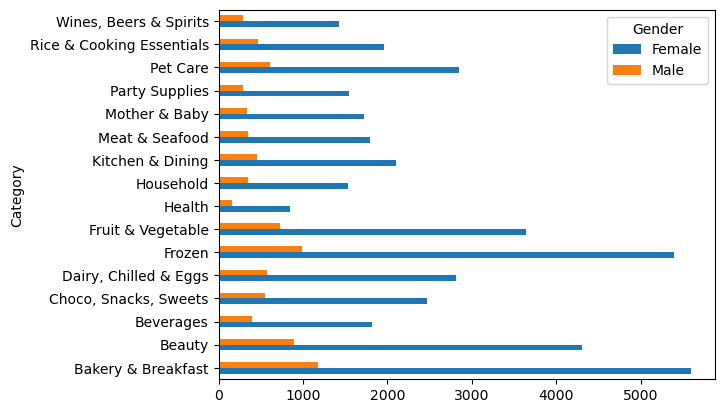

In [12]:
df_data.pivot_table(index=['Category'], columns = ['Gender'], aggfunc='size').plot(kind='barh');

Відповідь: Видно, що у всіх категоріях більше роблять покупки жінки. Можна запроопонувати акції, націлені на жіночу аудиторію.

4. Чи є якісь зміни в сумарних місячних прибутках в залежності від року?

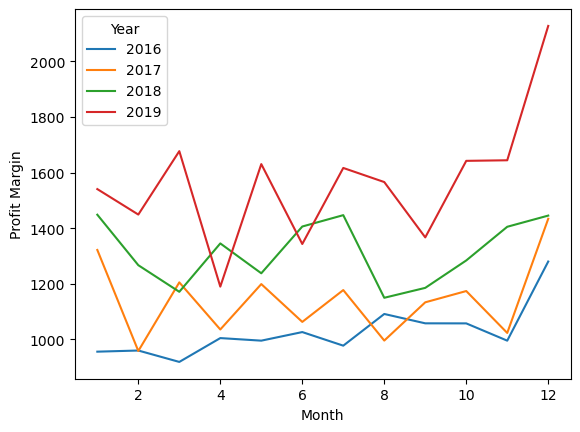

In [13]:
year_pivot = df_data.pivot_table(index='Month', columns='Year', values='Profit Margin', aggfunc='sum')
year_pivot.plot()
plt.ylabel('Profit Margin');

Відповідь: З кожним роком можно спостерігати тенденцію збільшення сумарних місячних прибутків, особливо за останні пів року. Потрібно звернути увагу на ті зміни в роботі, які відбулися за останній рік.

5. Які суми місячних прибутків за останній 2019 рік по кожній країні? 

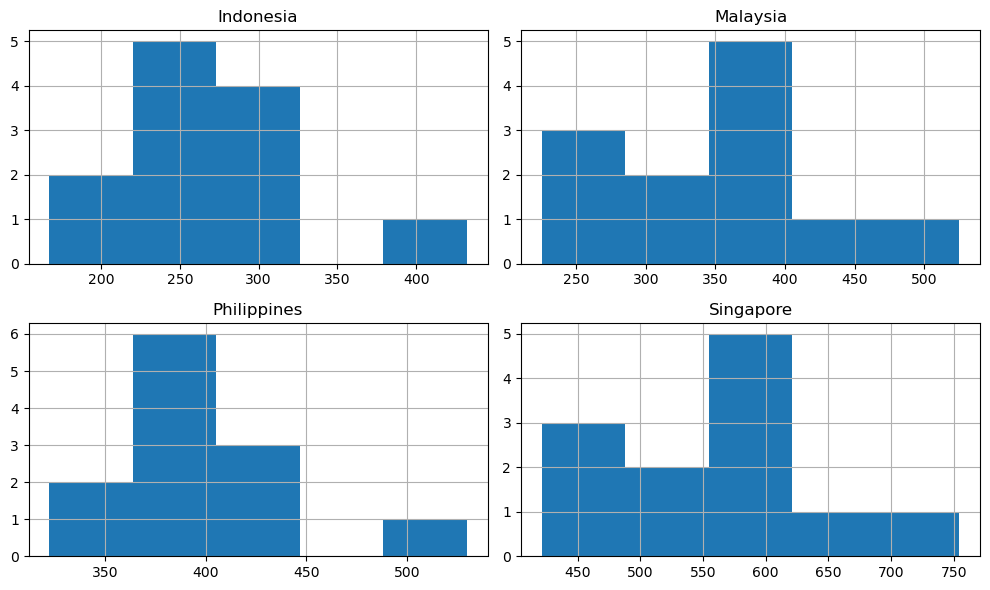

In [14]:
country_pivot = df_data[df_data.Year == 2019].pivot_table(index='Month', columns='Country', values='Profit Margin', aggfunc='sum')
country_pivot.hist(figsize=(10,6), bins=5)
plt.tight_layout();

Відповідь: Найбільші суми місячних прибутків за 2019 рік в Сінгапурі. 

In [15]:
df_data[['Country', 'City']].drop_duplicates()

,Country,City
0,Indonesia,Jakarta
9108,Malaysia,Kuala Lumpur
19871,Philippines,Manila
32251,Singapore,Bedok
44523,Singapore,Woodlands


Видно, що в Сінгапурі знаходяться  магазини в двух містах. Тому потрібно буде перевірити показник також відносно кожного міста.

6.Які суми місячних прибутків за останній 2019 рік по кожному місту?

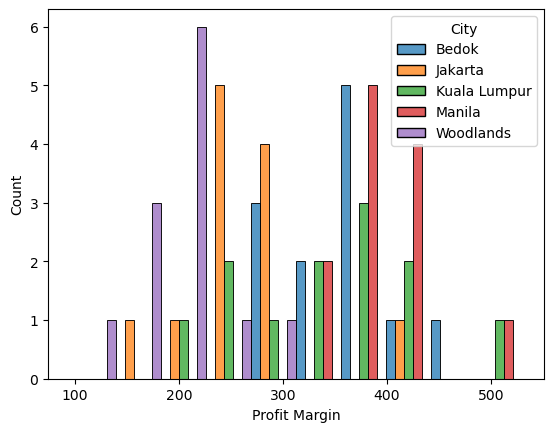

In [16]:
city_pivot = df_data[df_data.Year == 2019].pivot_table(index='Month', columns='City', values='Profit Margin', aggfunc='sum')
sns.histplot(data=city_pivot, bins=10, multiple="dodge")
plt.xlabel('Profit Margin');

Відповідь:Великі суми місячних прибутків показав магазин в Манілі. Потрібно знайти відмінності даного магазину від інших. 

7. Яка залежність між віком покупця та чеком?

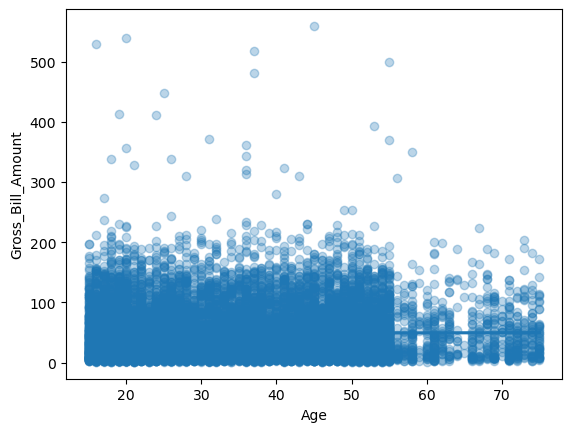

In [17]:
df_checks = df_data[['Receipt_Number', 'Age', 'City', 'Payment Mode', 'Gross_Bill_Amount']].drop_duplicates()
sns.regplot(data=df_checks, x="Age", y="Gross_Bill_Amount",  scatter_kws = {"alpha": 0.3});

Відповідь: Більше покупок з чеками на велику сумму (і взагалі більше покупок) роблять люди віком приблизно до 55 років. Звернути на це увагу при розробці нових акційних пропозицій.

8. Яким способом розраховуються покупці за товар в різних містах?

In [18]:
df_checks.pivot_table(index=['City'], columns = ['Payment Mode'],  aggfunc='size')

Payment Mode,Card,Cash,Wallet
City,,,
Bedok,1075,1049,1040
Jakarta,749,875,795
Kuala Lumpur,1002,821,1013
Manila,1052,1045,997
Woodlands,529,458,548


Відповідь: запропонувати ввести якісь бонуси при розрахунку не готівкою.

9. Який середній чек жінок та чоловіків?

In [19]:
data_female = df_data[df_data.Gender == 'Female'].Gross_Bill_Amount.unique()
data_male = df_data[df_data.Gender == 'Male'].Gross_Bill_Amount.unique()
print(f'Середній чек жінок: {data_female.mean():.3f}')
print(f'Середній чек чоловіків: {data_male.mean():.3f}')

Середній чек жінок: 50.228
Середній чек чоловіків: 47.094


10. Чи є статистично значущою різниця середнього чеку жінок та чоловіків?

In [20]:
alpha = 0.05
ztest_Score, p_value = ztest(data_female, data_male, value = 0)
print(f'p_value: {p_value:.6f}')
if(p_value <=  alpha):
    print("Відхилити Н0.")
else:
    print("Н0 не може бути відхилена.")


p_value: 0.002730
Відхилити Н0.


Відповідь: Маємо статистично значущу різниця у розмірі середнього чека чоловіків і жінок. Можемо запропонувати  якісь акції або бонуси,які будуть цікаві жінкам, щоб ще збільшити розмір середнього чека.